In [3]:
# 导入包
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


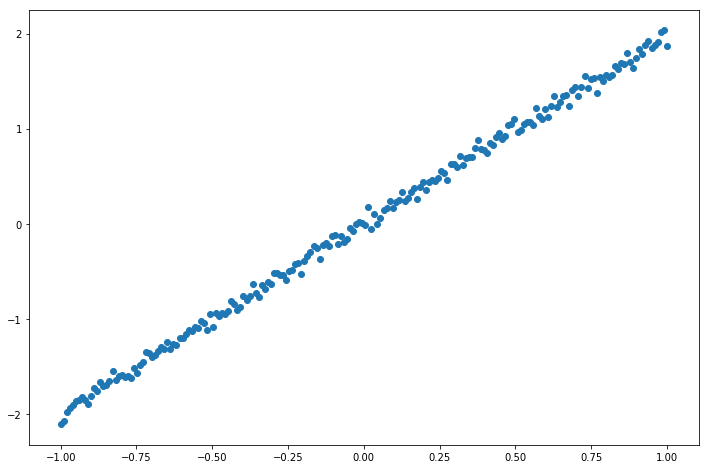

In [8]:
# 创建数据集
x = np.linspace(-1, 1, 200)
np.random.shuffle(x) # 打乱200个数据点
y = 2 * x + np.random.normal(0, 0.05, (200, ))  # 线性分布
# plot data
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.show()


In [12]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2019)

In [9]:
model = Sequential()
model.add(Dense(units=1, input_dim=1)) 
model.compile(loss='mse', optimizer='sgd')  # 回归损失函数一般使用mse
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
160/160 [==============================] - 0s 100us/step - loss: 3.2164
Epoch 2/100
160/160 [==============================] - 0s 93us/step - loss: 2.6178
Epoch 3/100
160/160 [==============================] - 0s 125us/step - loss: 2.1263
Epoch 4/100
160/160 [==============================] - 0s 174us/step - loss: 1.7277
Epoch 5/100
160/160 [==============================] - 0s 137us/step - loss: 1.4042
Epoch 6/100
160/160 [==============================] - 0s 156us/step - loss: 1.1436
Epoch 7/100
160/160 [==============================] - 0s 175us/step - loss: 0.9306
Epoch 8/100
160/160 [==============================] - 0s 168us/step - loss: 0.7564
Epoch 9/100
160/160 [==============================] - 0s 150us/step - loss: 0.6160
Epoch 10/100
160/160 [==============================] - 0s 156us/step - loss: 0.5011
Epoch 11/100
160/160 [==============================] - 0s 106us/step - loss: 0.4080
Epoch 12/100
160/160 [==============================] - 0s 193us/step - los

160/160 [==============================] - 0s 125us/step - loss: 0.0029
Epoch 97/100
160/160 [==============================] - 0s 93us/step - loss: 0.0029
Epoch 98/100
160/160 [==============================] - 0s 156us/step - loss: 0.0030
Epoch 99/100
160/160 [==============================] - 0s 118us/step - loss: 0.0029
Epoch 100/100
40/40 [==============================] - 0s 125us/step
Test cost: 0.002538718399591744
权重参数= [[1.9926071]] 
偏置= [-0.00454042]


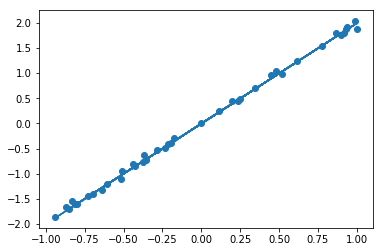

In [14]:
# 模型训练
# 训练方法一
# for step in range(300):
#     cost = model.train_on_batch(x_train, y_train)
#     if step % 100 == 0:
#         print('train cost: ', cost)

# 训练方法二（一般不使用第一种，因为第二种对batch，loader等配合更好）
model.fit(x_train, y_train, batch_size=10, verbose=True, epochs=100)

# 验证集上验证训练效果
cost = model.evaluate(x_valid, y_valid, batch_size=10)
print('Test cost:', cost)
W, b = model.layers[0].get_weights()  # 获取训练后的权重
print('权重参数=', W, '\n偏置=', b)

# 可视化预测结果
y_pred = model.predict(x_valid)
plt.scatter(x_valid, y_valid)
plt.plot(x_valid, y_pred)
plt.show()